In [55]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from collections import Counter
import pandas as pd
from os import path
from PIL import Image
from numpy import nan
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [56]:
df = pd.read_csv("german_wordlist.txt", header = None)

In [57]:
df['First two letters'] = df[0].str[:2]

In [58]:
df['First two letters'] = df['First two letters'].str.lower()

In [59]:
german_abc = ["a" ,"b" ,"c" ,"d" ,"e" ,"f" , "g" ,"h" , "i" ,"j" ,"k" ,"l", "m" , "n" ,"o" ,"p" ,"q" ,"r" ,
              "s" ,"t" ,"u" ,"v" ,"w" ,"x" ,"y" ,"z" ,"ä" ,"ö" ,"ü"]

In [60]:
german_abc_combinations = product(german_abc, repeat = 2)
german_abc_combinations_l = list(german_abc_combinations)

In [61]:
all_german_abc_pairs = [''.join(tups) for tups in german_abc_combinations_l]

In [62]:
countered_combinations = Counter(df['First two letters'])
del countered_combinations['nan']

In [63]:
countered_combinations_keys = list(countered_combinations.keys())
countered_combinations_keys1 = [item for item in countered_combinations_keys if not(pd.isnull(item)) == True]

In [64]:
letter1, letter2 = zip(*german_abc_combinations_l)
letter1 = list(letter1)
letter2 = list(letter2)
values = []
for i in range(0, len(letter1)):
    key = letter1[i] + letter2[i]
    value = countered_combinations[key] if key in countered_combinations.keys() else 0
    values.append(value)

In [68]:
df_heatmap = pd.DataFrame({'First letter': letter1, 'Second letter': letter2, 'count': values})
df_wordcloud = df_heatmap.copy()
df_wordcloud["Two letters"] = df_wordcloud[["First letter", "Second letter"]].apply("".join, axis = 1)
del df_wordcloud["First letter"]
del df_wordcloud["Second letter"]
df1_heatmap = df_heatmap.drop(df_heatmap[df_heatmap.values == 0].index)

C:\Users\PC\AppData\Local\Temp\ipykernel_1300\2038794504.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_another_heatmap = df1_heatmap.pivot("First letter", "Second letter", "count")


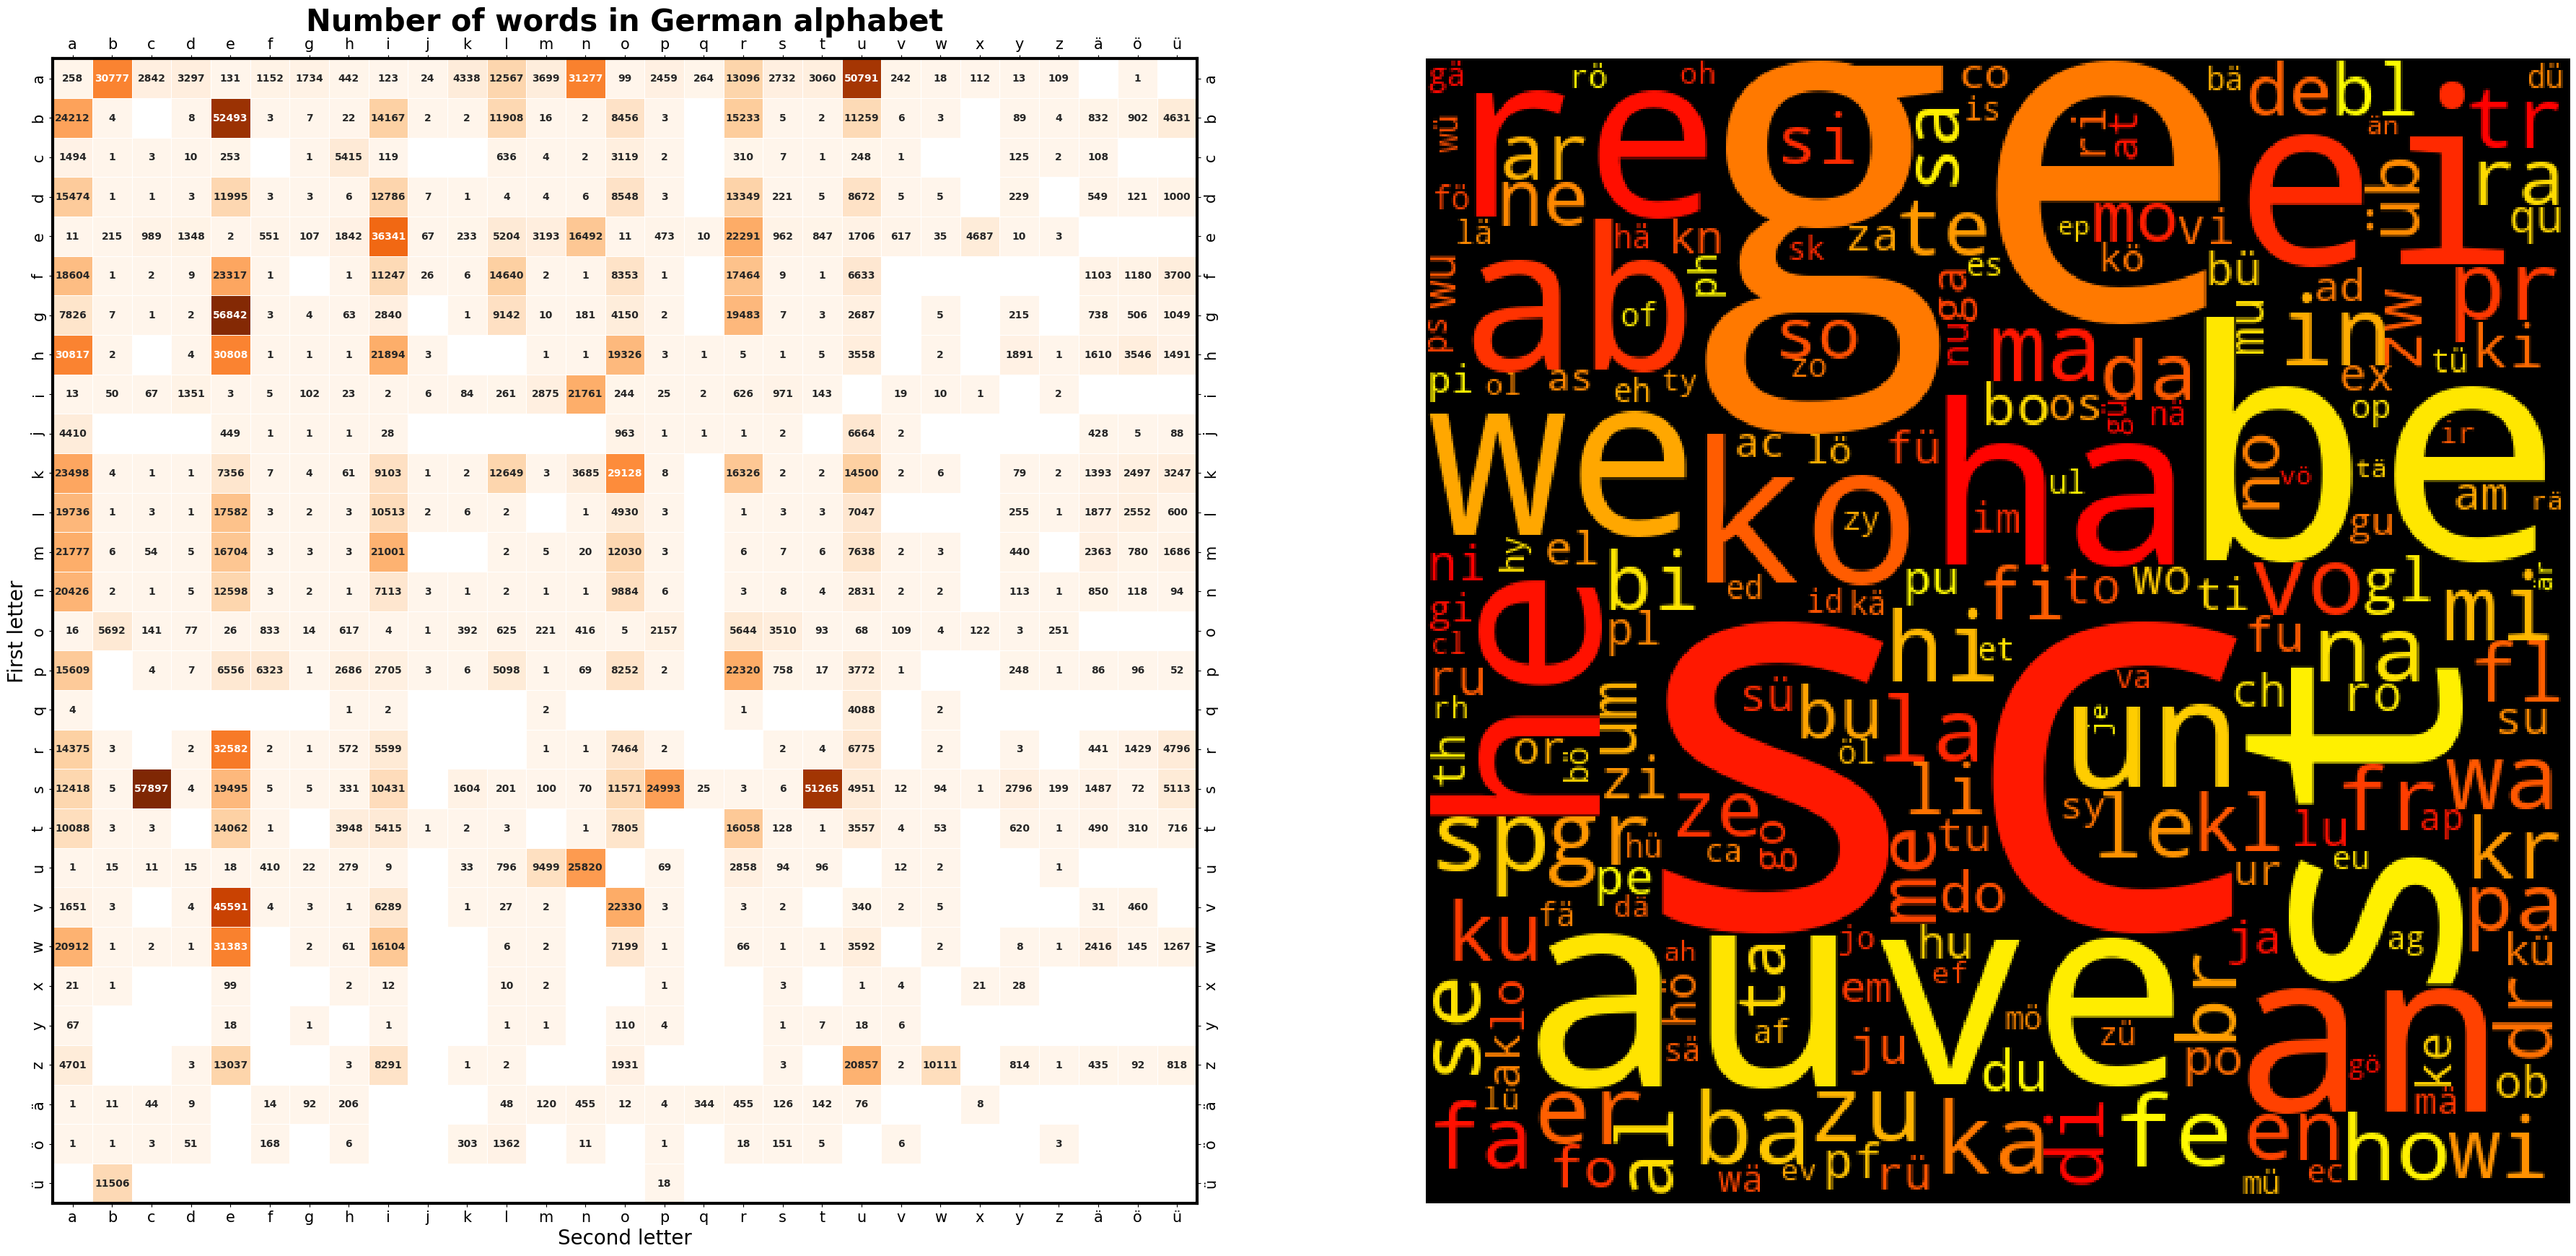

In [70]:
fig,ax = plt.subplots(1,2, figsize=(45, 30)) 



plt.subplot(121)

df_another_heatmap = df1_heatmap.pivot("First letter", "Second letter", "count")
plt.tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0, rotation=0)
plt.xticks(rotation='horizontal')
plt.yticks(rotation='horizontal')
plt.tick_params(labelsize=15)
sth = sns.heatmap(df_another_heatmap, cmap='Oranges', annot = True, linewidth=.5, fmt='g', cbar=False, square=True,
                  annot_kws={'fontweight': 'bold'})
sth.set_xlabel("Second letter",fontsize=20)
sth.set_ylabel("First letter",fontsize=20)

for _, spine in sth.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)
    spine.set_linestyle("solid")
    

    
plt.title('Number of words in German alphabet', fontsize = 30, fontweight = 'bold')



plt.subplot(122)
unique_string1=(" ").join(countered_combinations_keys1)
wordcloud = WordCloud(width = 500, height = 500, collocations=False, 
                      colormap='autumn').generate_from_frequencies(countered_combinations)
plt.imshow(wordcloud)


plt.axis("off")

plt.show()